In [1]:
import sys
sys.path.append('../../')

In [2]:
from scripts.utils import data_path, set_mpl, read_hamelin, add_datetime_features, read_london, read_trentino
from scripts.calendar import timeanddate_calendar
from scripts.google_trends import download_google_trends

matplotlib settings set


In [3]:
import pandas as pd
import numpy as np

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

import os
import tqdm
import requests
from datetime import datetime, timedelta
import time

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing

import lightgbm as lgb

from pytrends.request import TrendReq

In [4]:
hamelin_energy, hamelin_weather, hamelin_metadata = read_hamelin()


    Loading Hamelin data from C:\Users\user\swarm_energAIser/0_data/.
    Houses number removed: 6, 17, 24, 25. 
    Houses with PV: ['13', '15', '26', '33'] 
    HOUSEHOLD and HEATPUMP energy consumption are separated. 
    Resolution: 60min 

    May-June 2019 data for home #34 excluded 
    Data before 2018-05-18 excluded (gaps)
    Data with zero difference between consecutive values dropped (malfunction)

    reutrns:
    df_energy: pd.DataFrame with energy consumption data
    df_weather: pd.DataFrame with weather data
    df_metadata: pd.DataFrame with metadata

    


DE/Education/Education


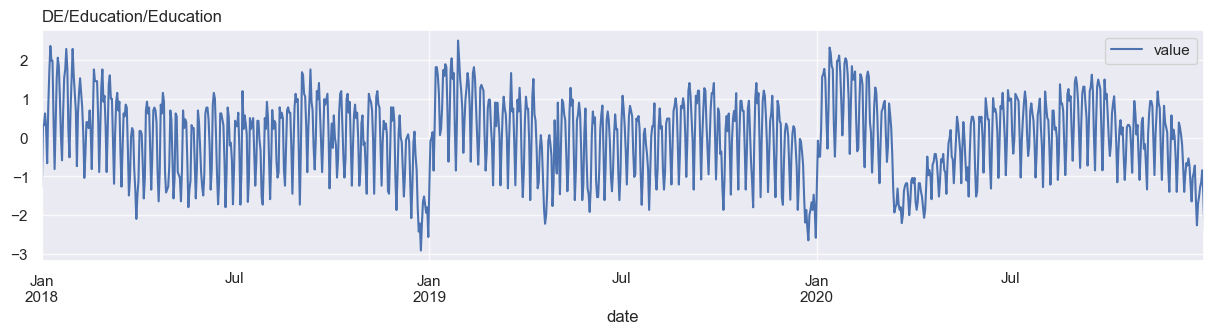

successful
----------------------------------------------------------------------------------------------------
DE/Education/Sex Education


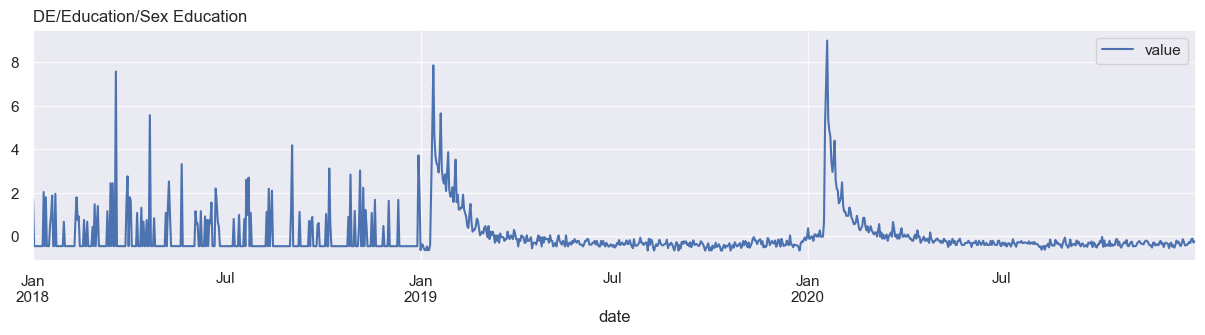

successful
----------------------------------------------------------------------------------------------------
DE/Education/Higher education


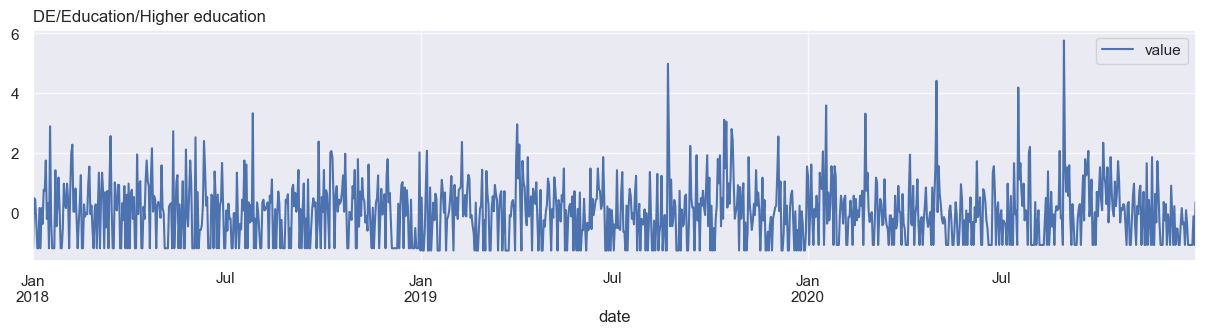

successful
----------------------------------------------------------------------------------------------------
DE/Education/Teacher


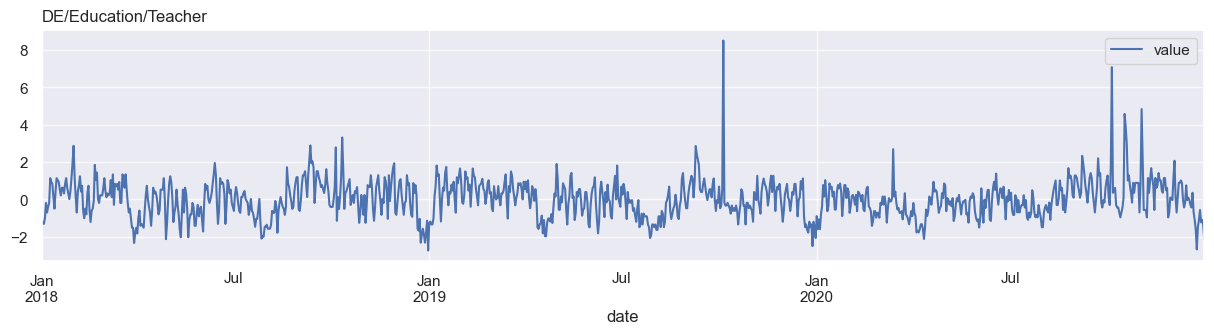

successful
----------------------------------------------------------------------------------------------------
DE/Education/College


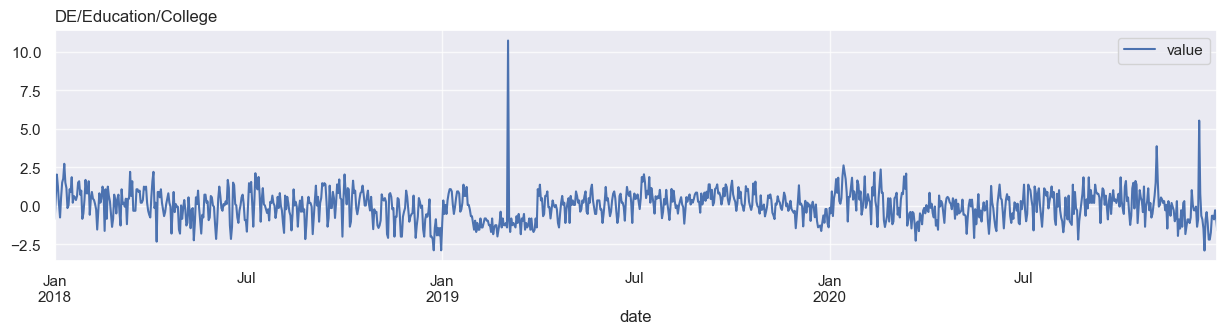

successful
----------------------------------------------------------------------------------------------------
DE/Education/Student


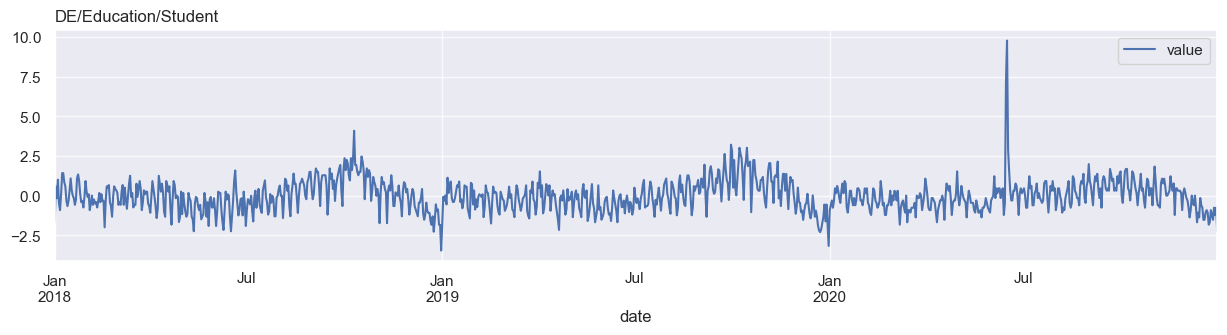

successful
----------------------------------------------------------------------------------------------------
DE/Education/Physical education


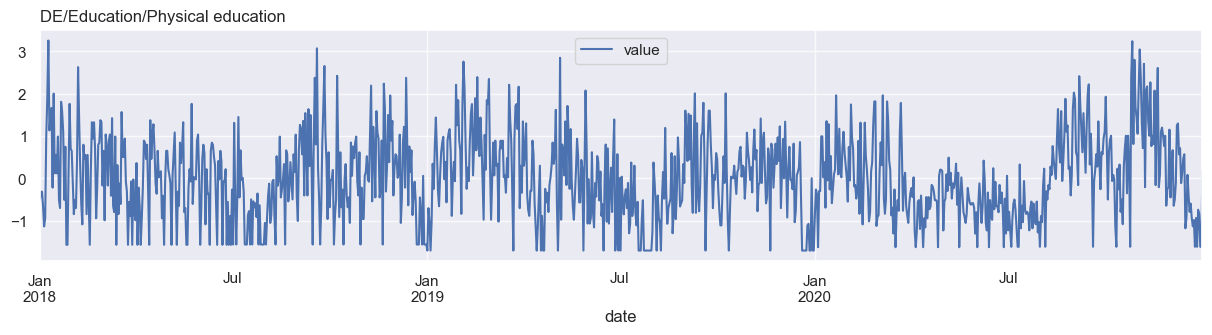

successful
----------------------------------------------------------------------------------------------------
DE/Education/Course


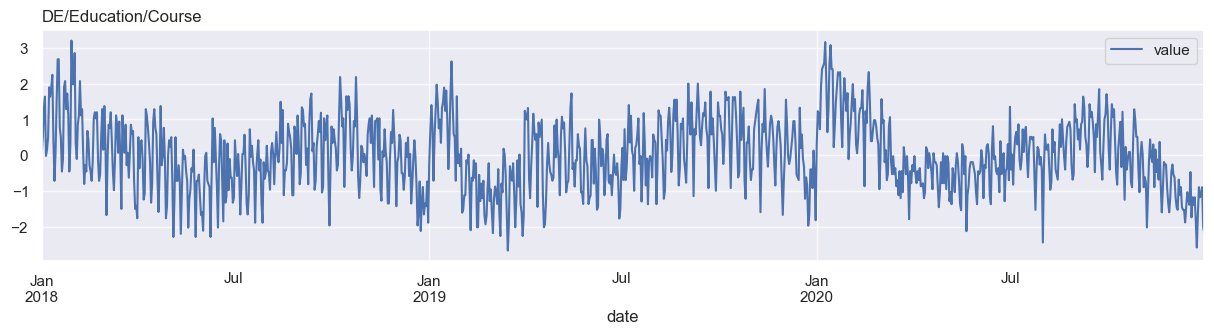

successful
----------------------------------------------------------------------------------------------------
DE/Education/Special education


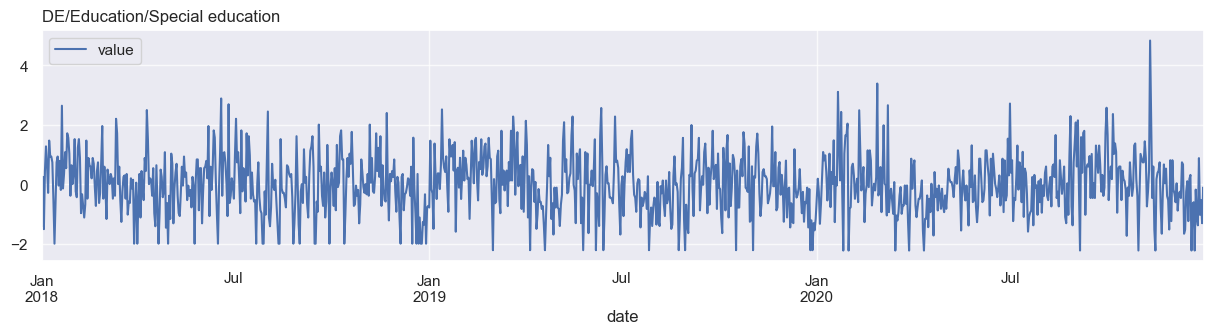

successful
----------------------------------------------------------------------------------------------------
DE/Education/Distance education


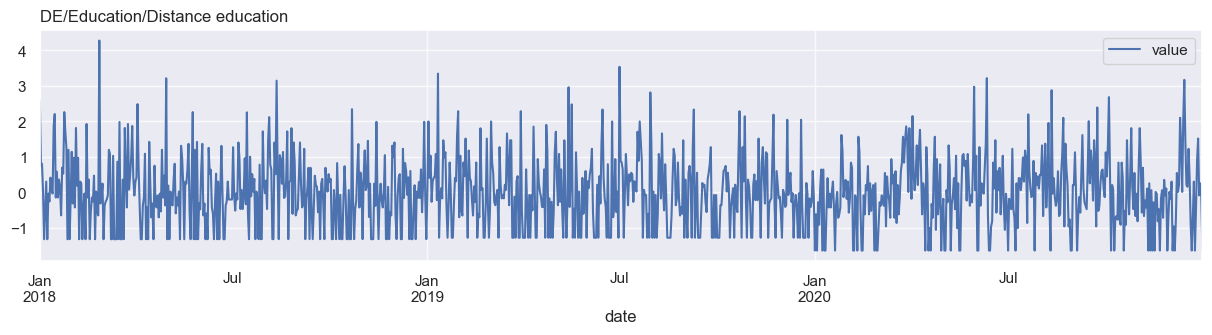

successful
----------------------------------------------------------------------------------------------------
DE/Education/Minister


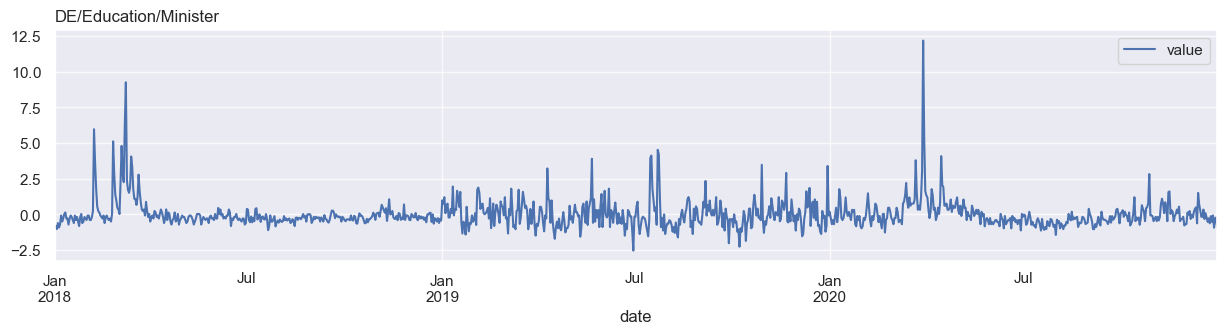

successful
----------------------------------------------------------------------------------------------------
DE/Education/Bachelor's degree


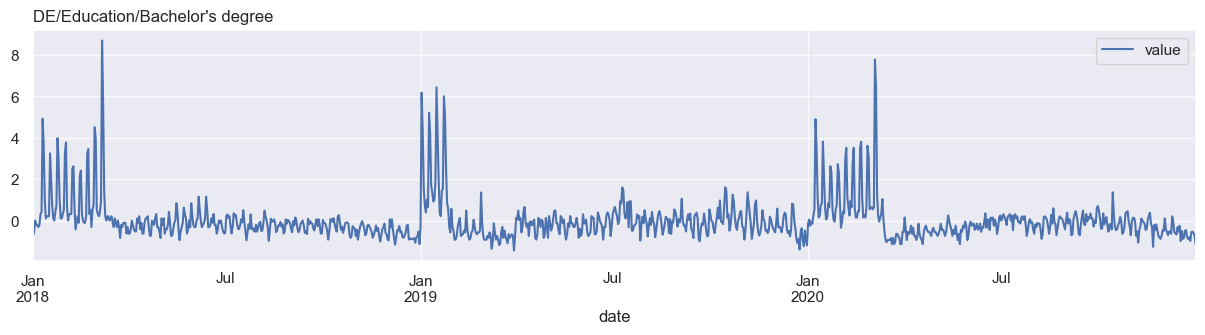

successful
----------------------------------------------------------------------------------------------------
DE/Education/Board of education


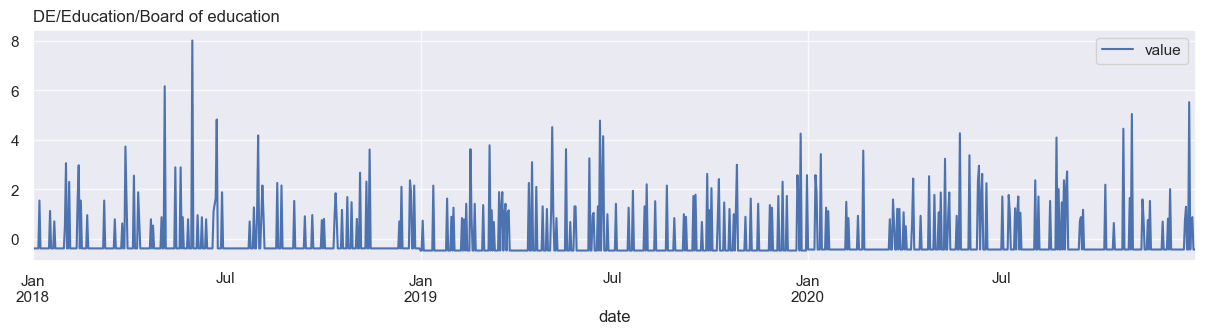

successful
----------------------------------------------------------------------------------------------------
DE/Education/School of education


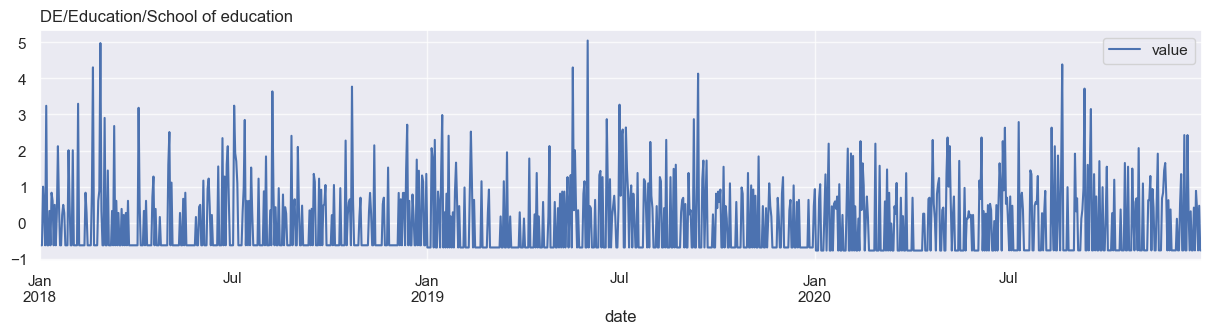

successful
----------------------------------------------------------------------------------------------------
DE/Education/Continuing education


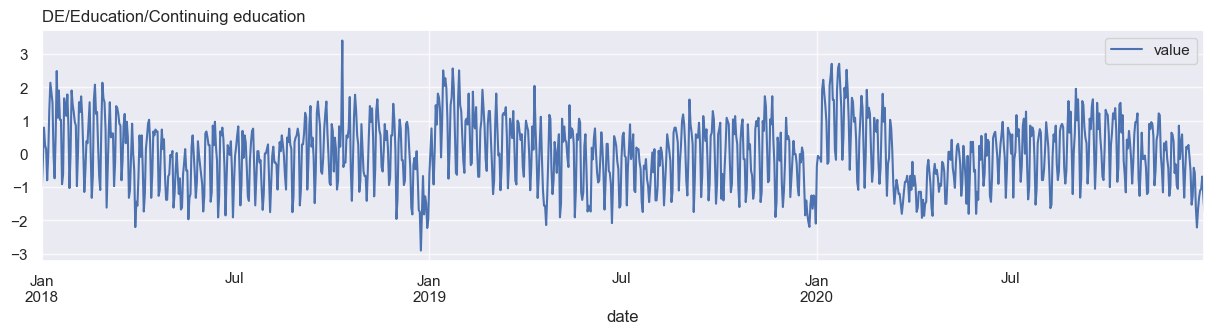

successful
----------------------------------------------------------------------------------------------------
DE/Education/Minecraft: Education Edition


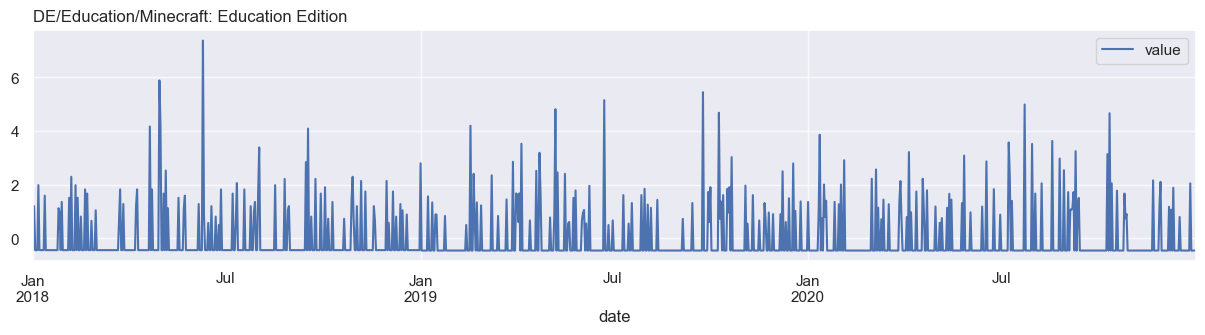

successful
----------------------------------------------------------------------------------------------------
DE/Education/Education minister


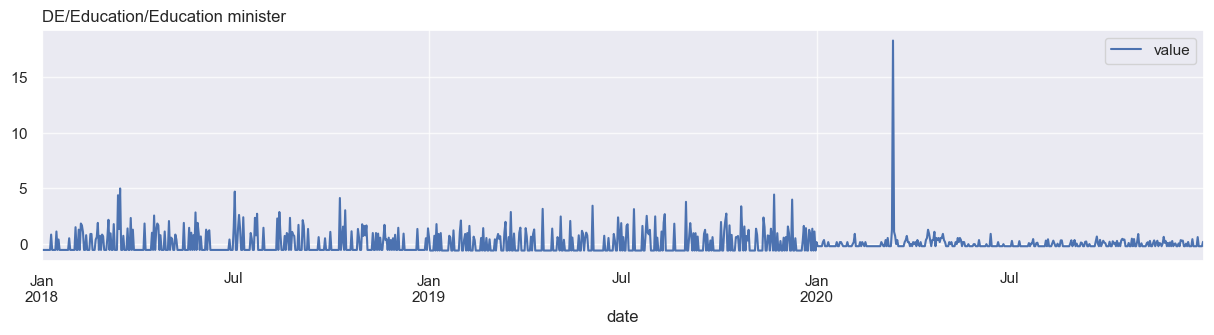

successful
----------------------------------------------------------------------------------------------------
DE/Education/Education policy


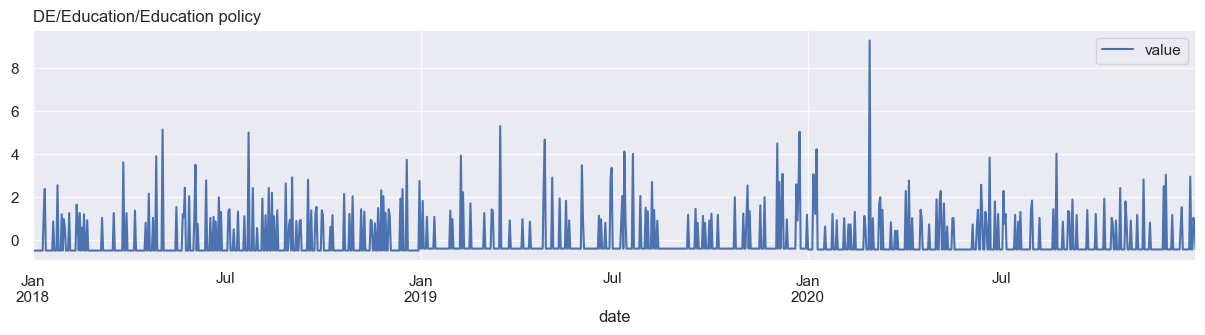

successful
----------------------------------------------------------------------------------------------------
DE/Education/Sex Education - Season 2


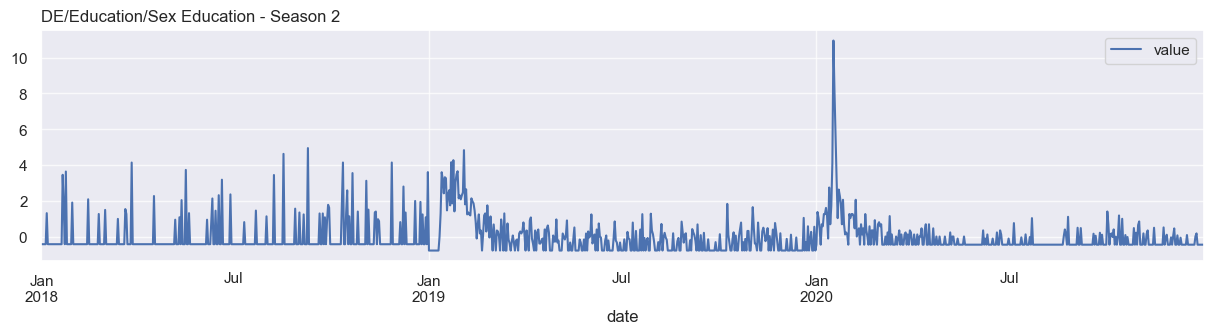

successful
----------------------------------------------------------------------------------------------------
DE/Education/Education Perfect


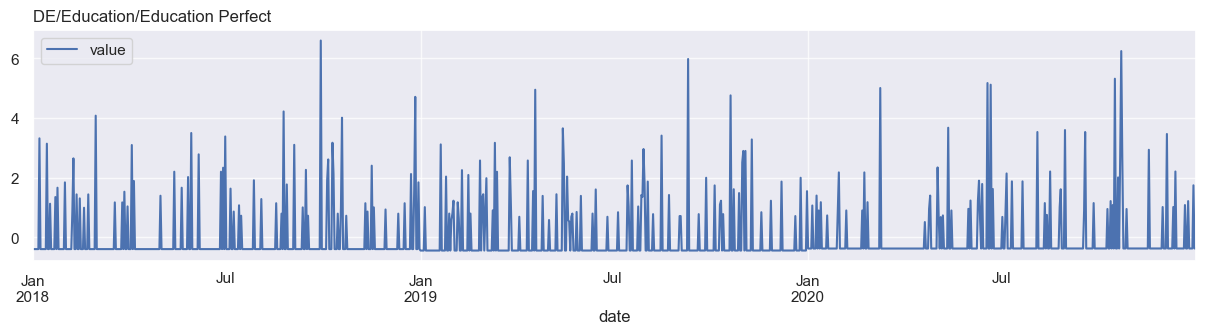

successful
----------------------------------------------------------------------------------------------------
DE/Education/Sex Education - Season 3


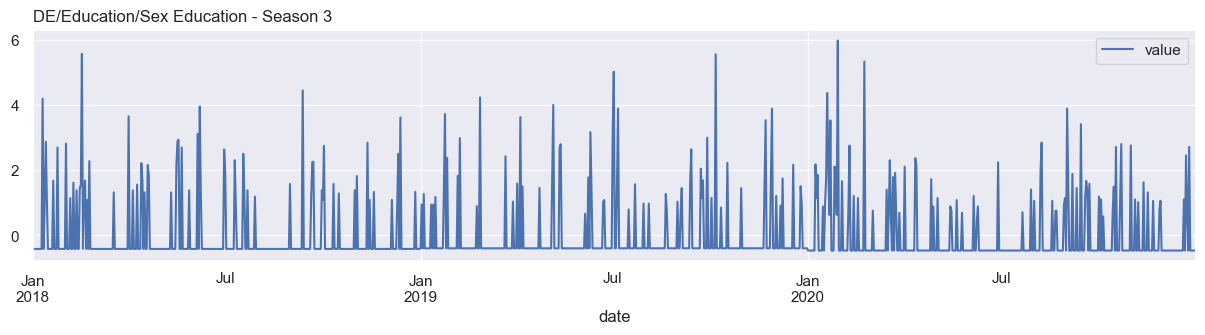

successful
----------------------------------------------------------------------------------------------------
DE/Education/Education Galaxy
error
DE/Education/National Education Policy 2020


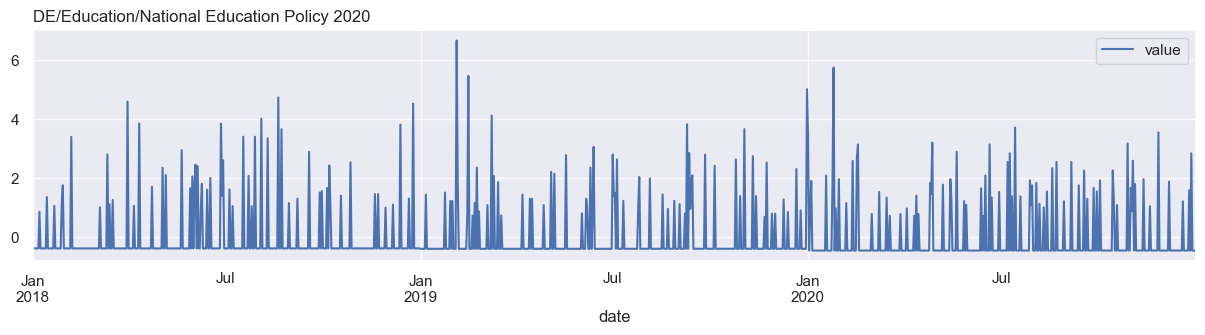

successful
----------------------------------------------------------------------------------------------------
DE/Education/Twelfth Grade


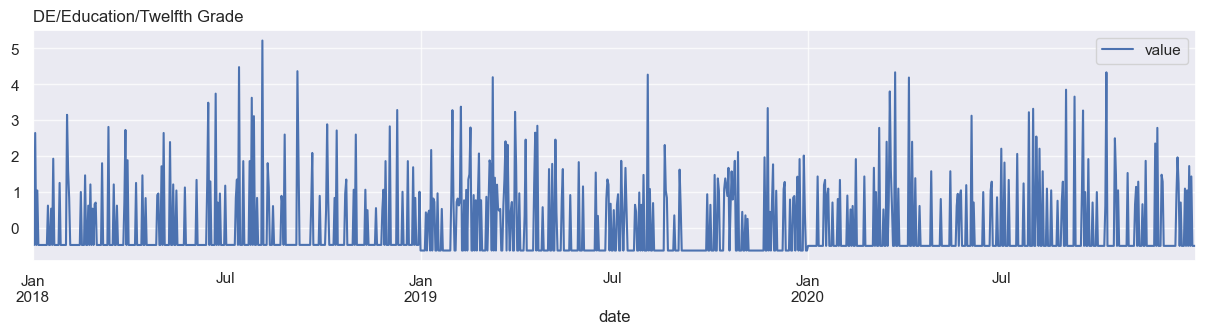

successful
----------------------------------------------------------------------------------------------------
DE/Office/Office


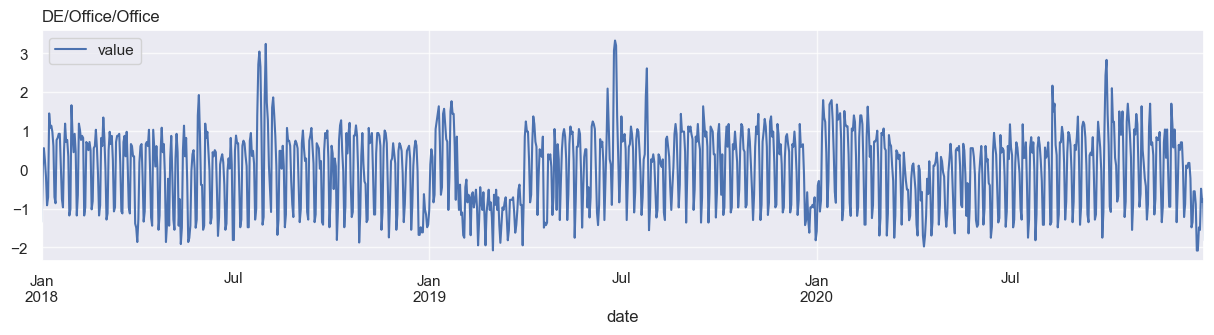

successful
----------------------------------------------------------------------------------------------------
DE/Office/Microsoft 365


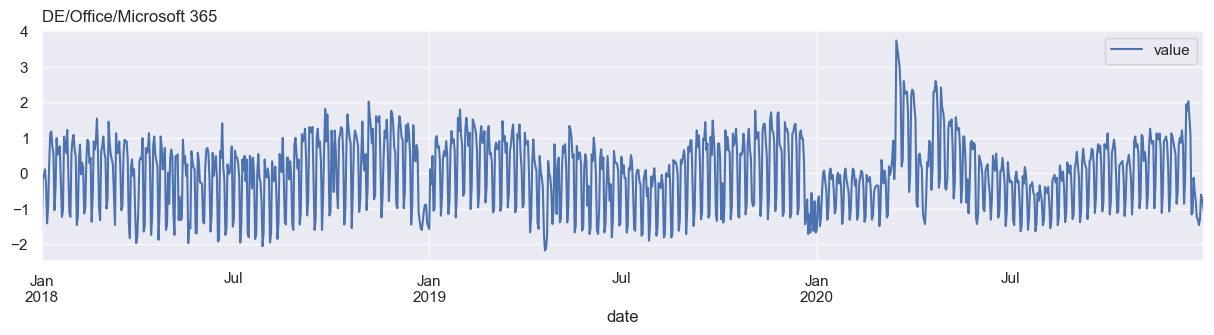

successful
----------------------------------------------------------------------------------------------------
DE/Office/Microsoft Office


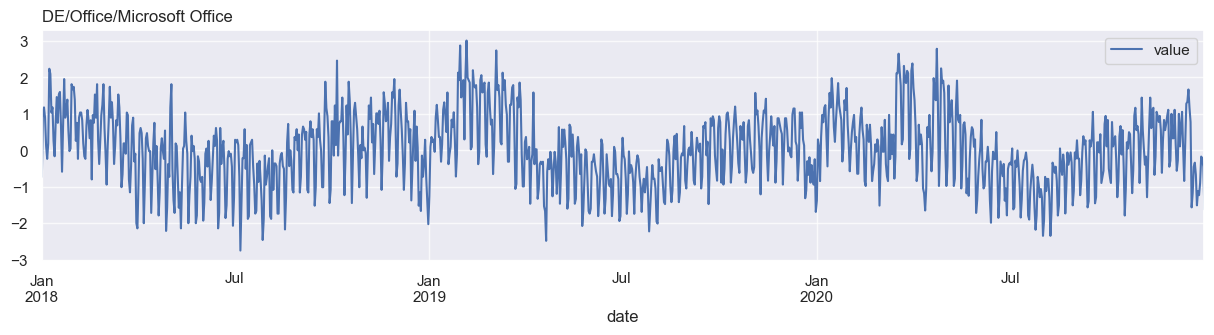

successful
----------------------------------------------------------------------------------------------------
DE/Office/Microsoft Corporation


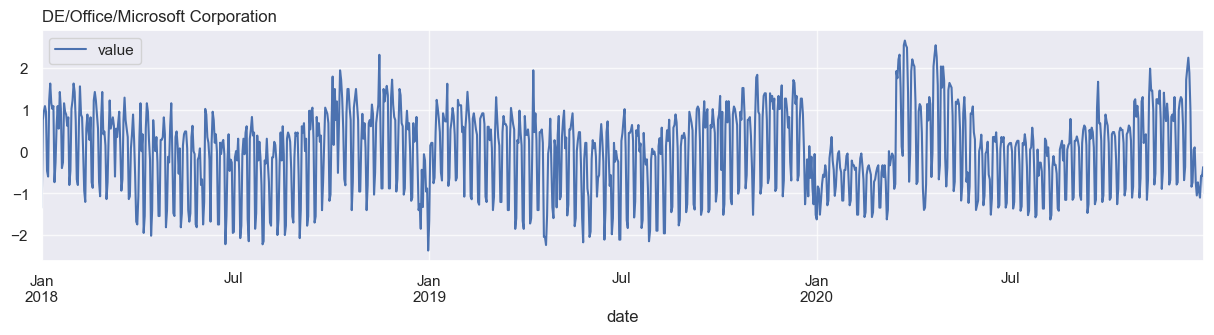

successful
----------------------------------------------------------------------------------------------------
DE/Office/Box office


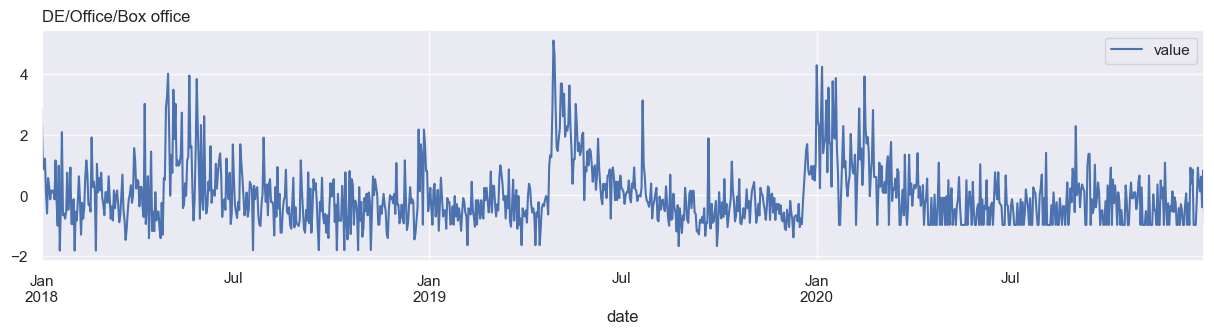

successful
----------------------------------------------------------------------------------------------------
DE/Office/United States Postal Service


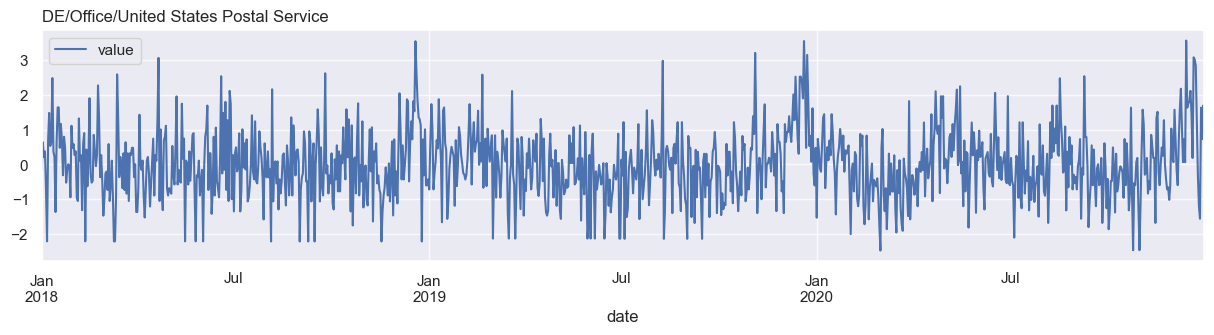

successful
----------------------------------------------------------------------------------------------------
DE/Office/Mail


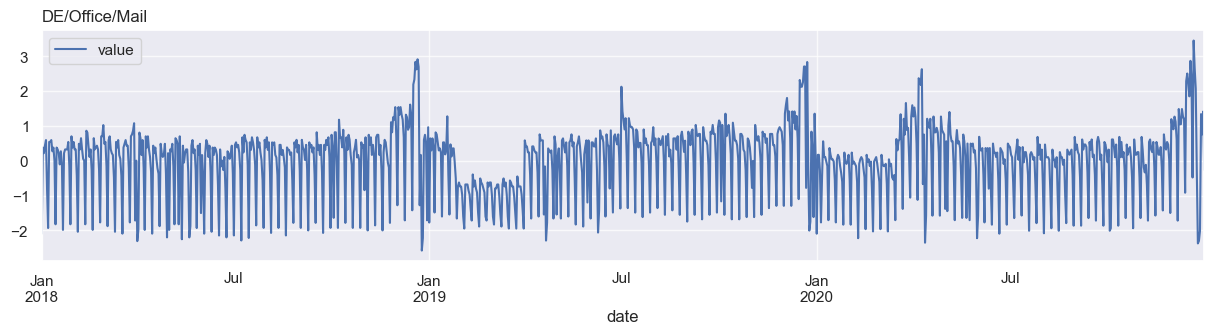

successful
----------------------------------------------------------------------------------------------------
DE/Office/The ODP Corporation


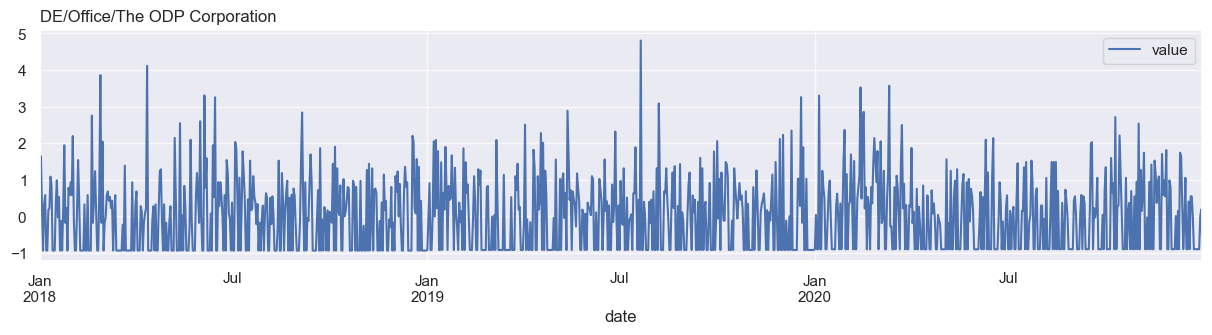

successful
----------------------------------------------------------------------------------------------------
DE/Office/The Office
error
DE/Office/Met Office
error
DE/Office/Post Office Limited
error
DE/Office/Post office
error
DE/Office/Office suite
error
DE/Office/Microsoft 365
error
DE/Office/India Post
error
DE/Office/Social Security Administration
error
DE/Office/Chair
error
DE/Office/Microsoft
error
DE/Office/Office chair
error
DE/Office/Microsoft Office 2019
error
DE/Office/Small office/home office
error
DE/Office/tourism office
error
DE/Office/WPS Office


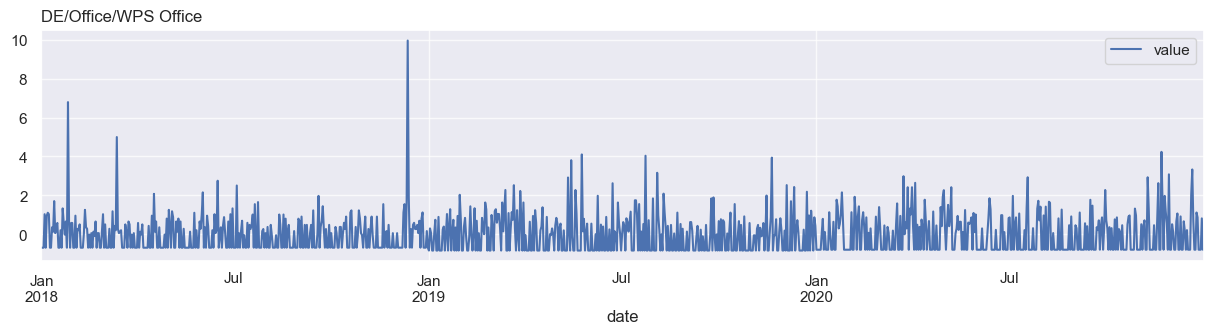

successful
----------------------------------------------------------------------------------------------------
DE/Excel/Microsoft Excel


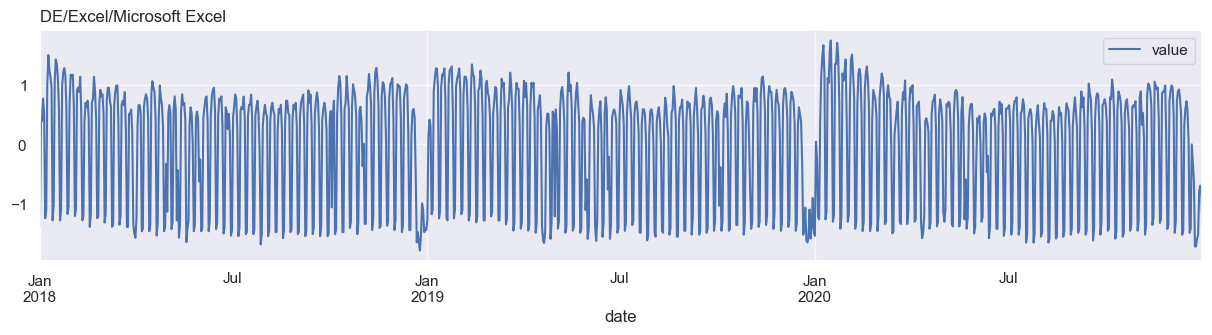

successful
----------------------------------------------------------------------------------------------------
DE/Excel/Formula


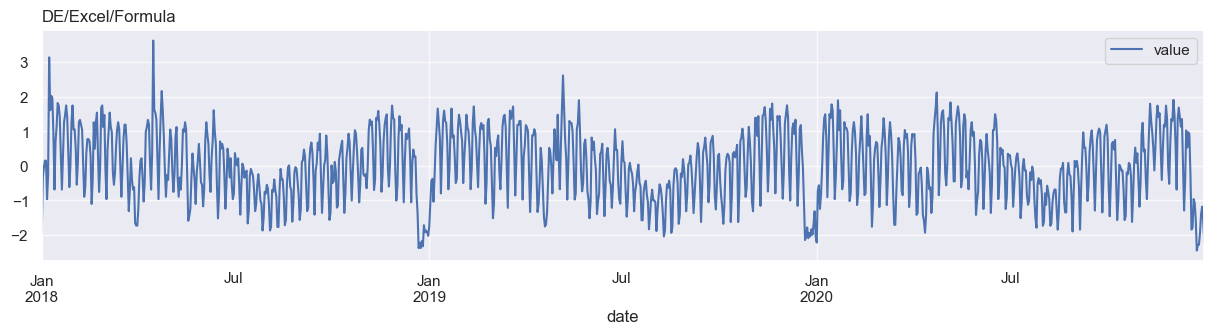

successful
----------------------------------------------------------------------------------------------------
DE/Excel/Cell


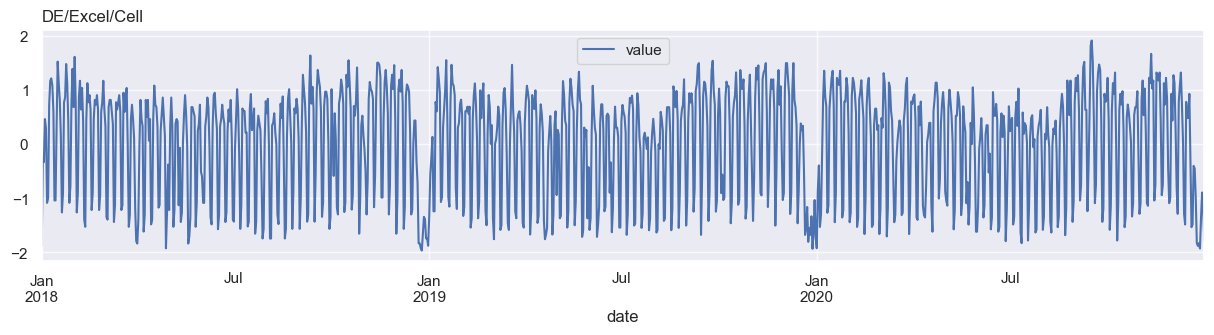

successful
----------------------------------------------------------------------------------------------------
DE/Excel/PDF


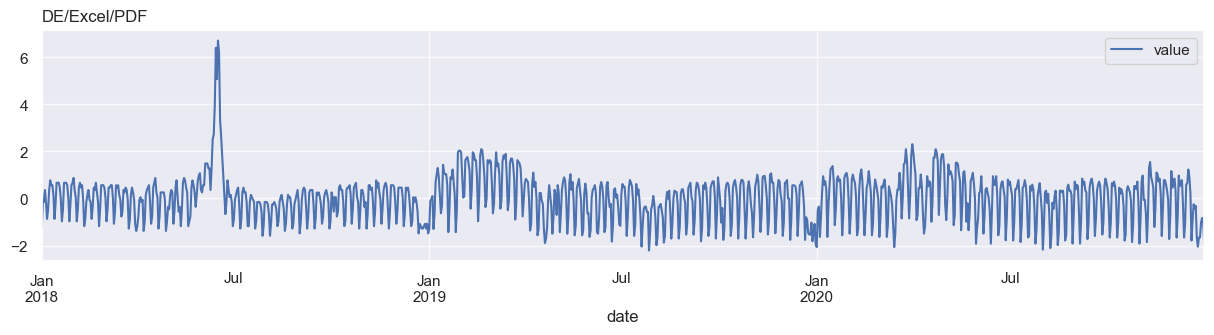

successful
----------------------------------------------------------------------------------------------------
DE/Excel/Data


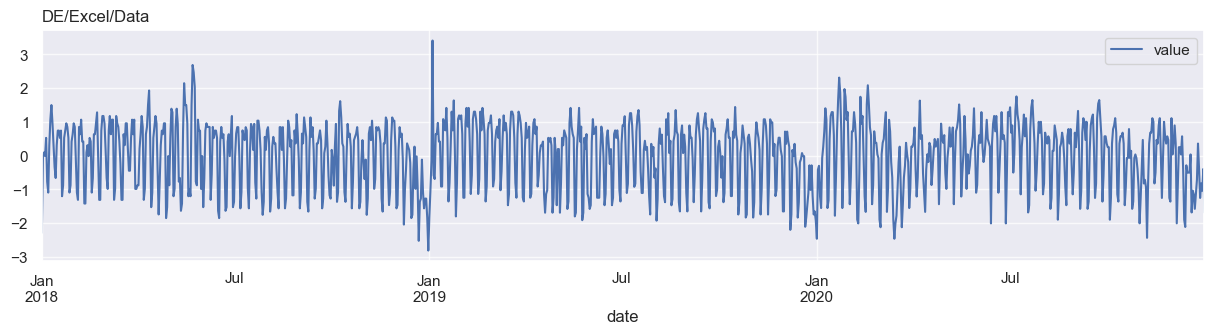

successful
----------------------------------------------------------------------------------------------------
DE/Excel/Computer file


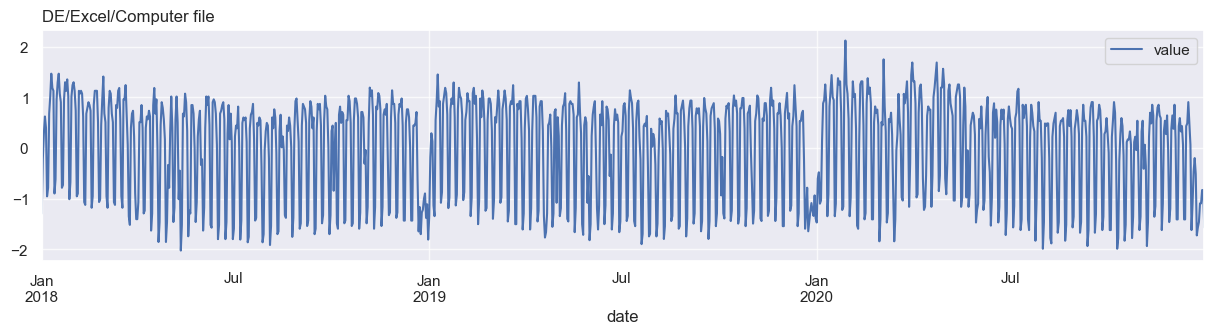

successful
----------------------------------------------------------------------------------------------------
DE/Excel/Function


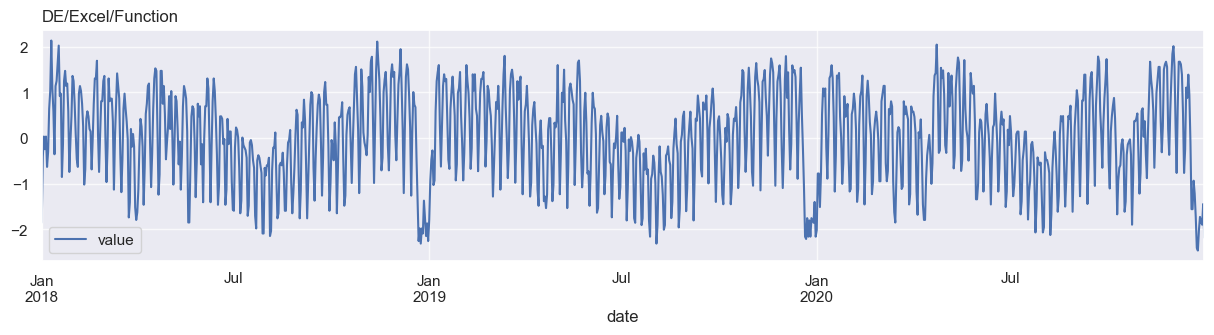

successful
----------------------------------------------------------------------------------------------------
DE/Excel/Column


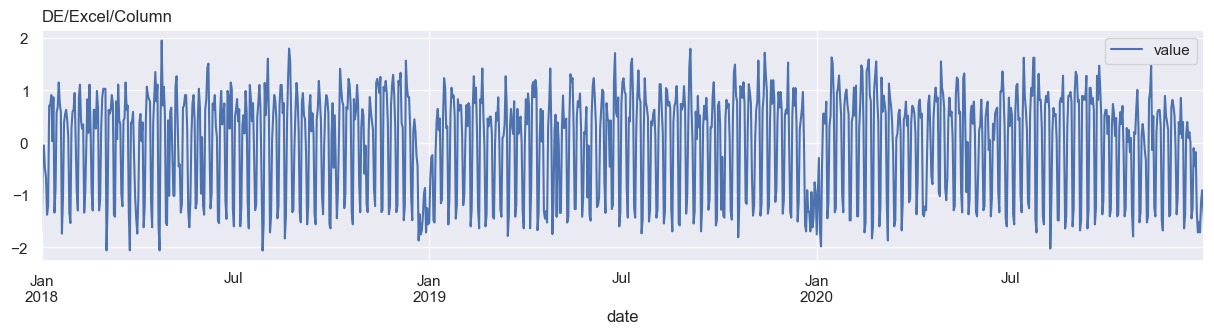

successful
----------------------------------------------------------------------------------------------------
DE/Excel/Table


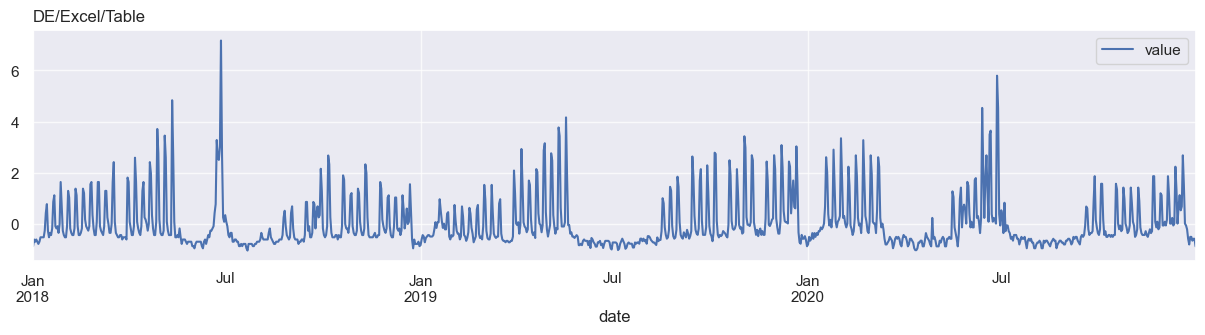

successful
----------------------------------------------------------------------------------------------------
DE/Excel/Chart


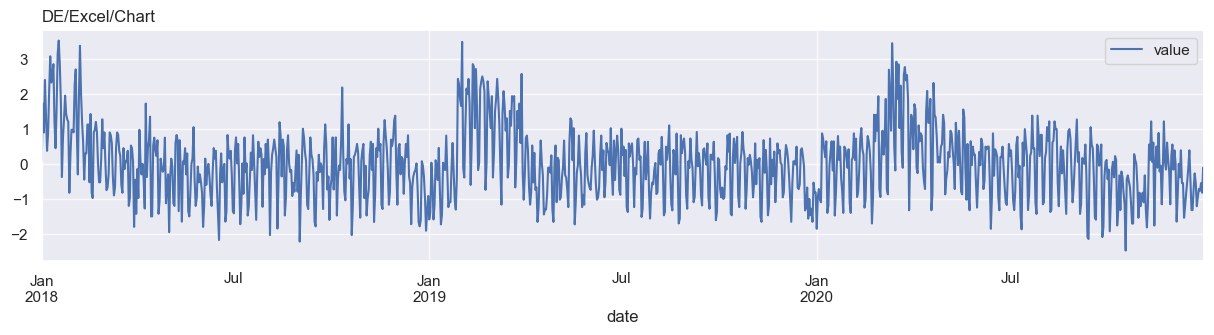

successful
----------------------------------------------------------------------------------------------------
DE/Excel/Row


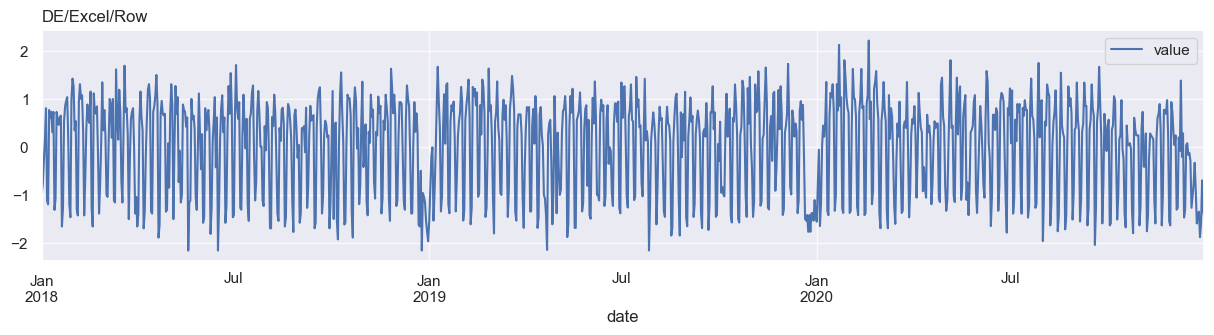

successful
----------------------------------------------------------------------------------------------------
DE/Excel/Visual Basic for Applications


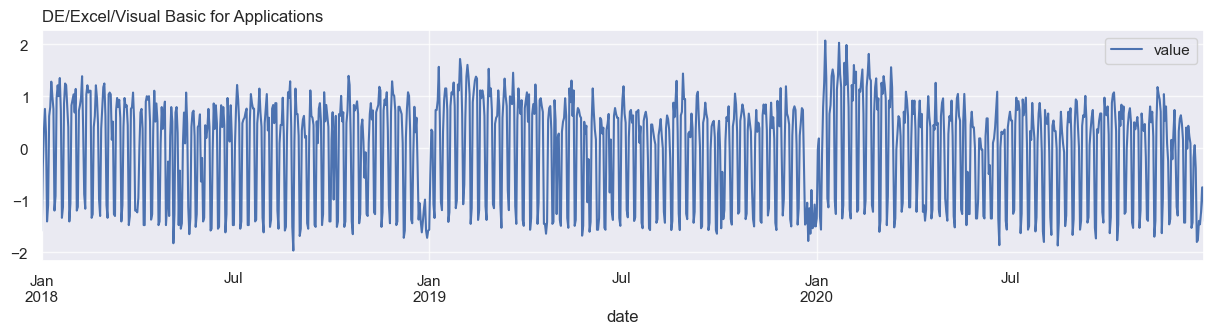

successful
----------------------------------------------------------------------------------------------------
DE/Excel/Calendar date


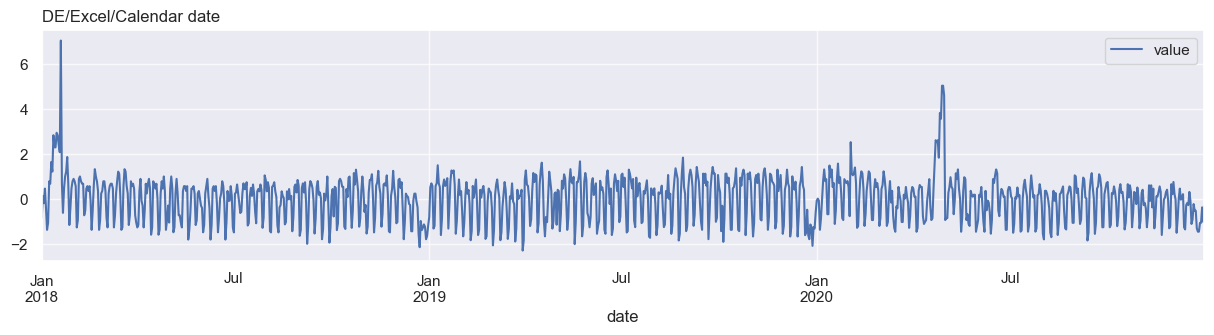

successful
----------------------------------------------------------------------------------------------------
DE/Excel/Calculation


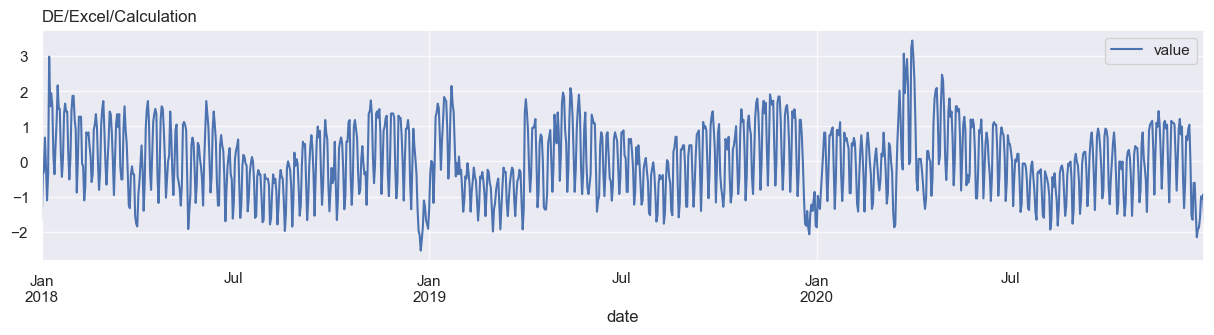

successful
----------------------------------------------------------------------------------------------------
DE/Excel/Microsoft Word


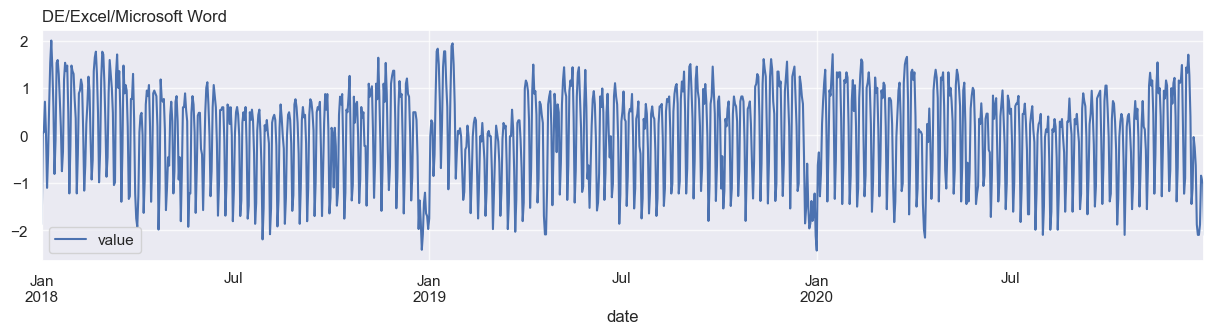

successful
----------------------------------------------------------------------------------------------------
DE/Excel/Spreadsheet


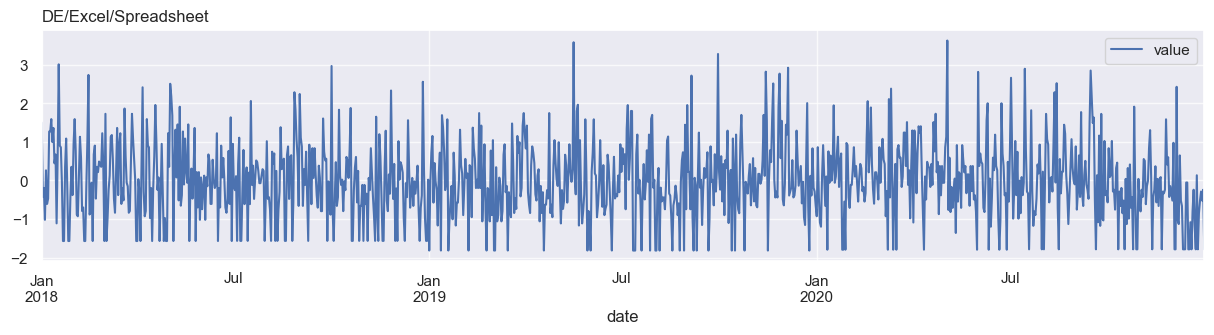

successful
----------------------------------------------------------------------------------------------------
DE/Excel/File format


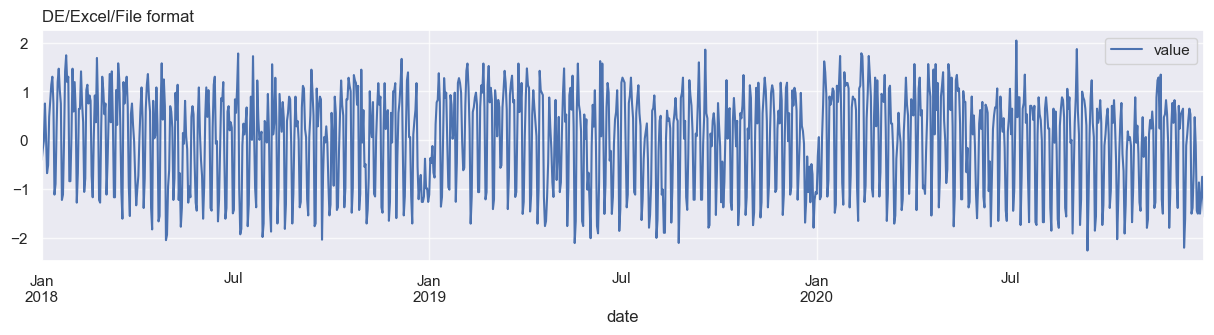

successful
----------------------------------------------------------------------------------------------------
DE/Excel/Drum


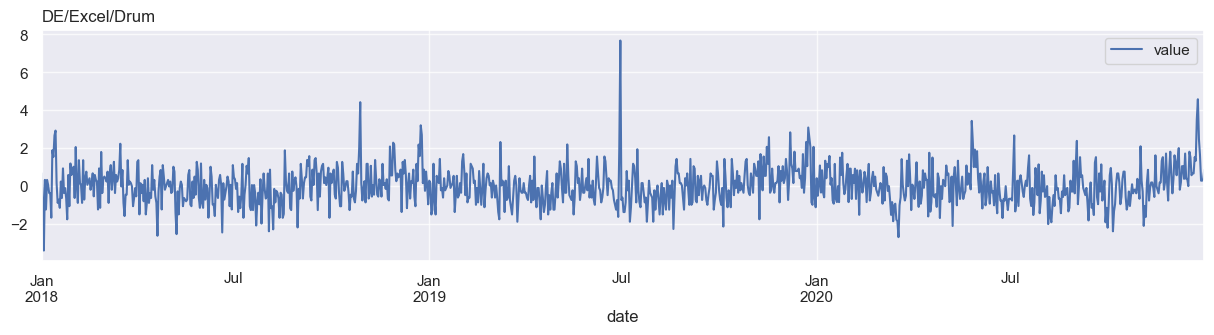

successful
----------------------------------------------------------------------------------------------------
DE/Excel/List


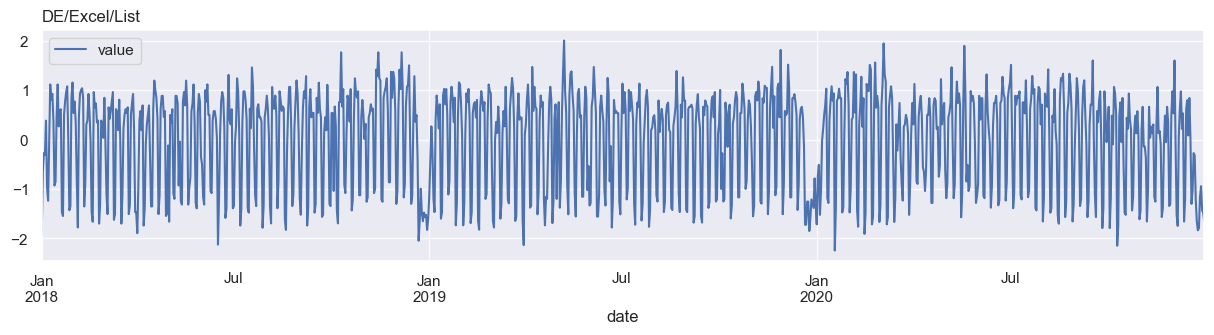

successful
----------------------------------------------------------------------------------------------------
DE/Excel/Google Sheets
error
DE/Excel/Macro
error
DE/Excel/Drop-down list
error
DE/Excel/Keyboard shortcut
error
DE/Excel/Counting
error


In [5]:
all_trends_DE = download_google_trends(geo_id='DE',     
                           list_primary_use = ['Education','Office','Excel'],
                           start_year=2018,
                           end_year=2020,
                           show_viz=True)

In [6]:
all_trends_DE = all_trends_DE.pivot_table(index='date',columns='title',values='value')
all_trends_DE.index = pd.to_datetime(all_trends_DE.index)
all_trends_DE

title       Bachelor's degree  Board of education  Box office  Calculation  \
date                                                                         
2018-01-01          -0.732247           -0.380488    2.835029    -1.701955   
2018-01-02          -0.523031           -0.380488    0.916468    -0.362415   
2018-01-03           0.000009           -0.380488    0.858330    -0.287996   
2018-01-04          -0.209207           -0.380488    1.207159     0.679450   
2018-01-05          -0.209207           -0.380488    0.102533    -0.139158   
...                       ...                 ...         ...          ...   
2020-12-27          -0.565566            0.823297    0.130669    -1.604724   
2020-12-28          -0.530524            0.882780    0.617948    -0.996961   
2020-12-29          -0.600609           -0.425841   -0.389095    -1.052212   
2020-12-30          -0.705736           -0.425841    0.812859    -0.941710   
2020-12-31          -1.126246           -0.425841   -0.973829    -1.715227   

title       Calendar date      Cell     Chart   College    Column  \
date                                                                
2018-01-01      -0.835075 -1.879842  0.080808 -0.847120 -1.695630   
2018-01-02       0.137436 -0.245743  1.730794  0.546823 -0.172820   
2018-01-03      -0.186735 -0.334072  0.905801  2.027888 -0.052599   
2018-01-04       0.461606  0.460895  2.405788  1.243795 -0.493412   
2018-01-05      -0.402848  0.284236  1.430796  0.111216 -0.653708   
...                   ...       ...       ...       ...       ...   
2020-12-27      -1.062791 -1.927224 -0.762419 -0.649173 -1.713406   
2020-12-28      -1.062791 -1.336904 -0.542078 -0.886771 -1.138215   
2020-12-29      -0.374793 -0.894164 -0.817505 -0.292777 -0.908139   
2020-12-30      -1.013649 -1.189324 -0.101394 -0.767972 -1.214907   
2020-12-31      -0.325650 -1.779644 -0.266650 -1.599562 -1.560022   

title       Computer file  Continuing education    Course      Data  \
date                                                                  
2018-01-01      -1.294015             -0.971088  0.065073 -2.290022   
2018-01-02      -0.223330             -0.149260  0.501369 -0.017194   
2018-01-03       0.283837              0.789972  1.286702  0.091036   
2018-01-04       0.621948              0.261654  1.635739 -0.017194   
2018-01-05       0.396540              0.144250 -0.022186  0.523956   
...                   ...                   ...       ...       ...   
2020-12-27      -1.095325             -1.105439 -1.179479 -1.259100   
2020-12-28      -1.095325             -1.052637 -1.109102 -0.828531   
2020-12-29      -0.831991             -0.683019 -0.897971 -1.043815   
2020-12-30      -0.831991             -1.263847 -2.024003 -0.397962   
2020-12-31      -1.569326             -1.739071 -2.164757 -1.689669   

title       Distance education      Drum  Education  Education Perfect  \
date                                                                     
2018-01-01            2.597015  0.656204  -1.266961          -0.397412   
2018-01-02            0.748552 -0.994674   0.320116          -0.397412   
2018-01-03            0.804566 -3.427546   0.320116          -0.397412   
2018-01-04            0.020370  0.308651   0.622416          -0.397412   
2018-01-05           -1.323966 -1.255339   0.244541          -0.397412   
...                        ...       ...        ...                ...   
2020-12-27            1.516212  1.607242  -1.276668          -0.376562   
2020-12-28           -0.087783  0.268069  -1.153431          -0.376562   
2020-12-29            0.252458  0.268069  -0.845341           1.742149   
2020-12-30           -0.136389  0.363724  -1.461522          -0.376562   
2020-12-31           -1.643171  0.842000  -2.385794          -0.376562   

title       Education minister  Education policy  File format   Formula  \
date                                                                      
2018-01-01           -0.577597         -0.492749  

In [7]:
df_holiday = timeanddate_calendar(geo_id='germany',start_year=2017,end_year=2021+1)
df_holiday

date holiday_Name holiday_Type
0    2017-01-01      weekend      weekend
1    2017-01-02      weekday      weekday
2    2017-01-03      weekday      weekday
3    2017-01-04      weekday      weekday
4    2017-01-05      weekday      weekday
...         ...          ...          ...
2186 2022-12-27      weekday      weekday
2187 2022-12-28      weekday      weekday
2188 2022-12-29      weekday      weekday
2189 2022-12-30      weekday      weekday
2190 2022-12-31      weekend      weekend

[2191 rows x 3 columns]

In [8]:
df_holiday_encode = df_holiday.copy()
df_holiday_encode[['holiday_Name', 'holiday_Type']] = df_holiday_encode[['holiday_Name', 'holiday_Type']].astype('str').apply(preprocessing.LabelEncoder().fit_transform)
df_holiday_encode.columns = df_holiday_encode.columns+'_encode'
df_holiday_encode = df_holiday_encode.rename(columns={'date_encode':'date'})

In [9]:
HOME_mean =  hamelin_energy.loc[:, hamelin_energy.columns.str.contains('HOME')].mean(axis=1)
TOT_mean =  hamelin_energy.loc[:, hamelin_energy.columns.str.contains('TOT')].mean(axis=1)
HEAT_mean =  hamelin_energy.loc[:, hamelin_energy.columns.str.contains('HEAT')].mean(axis=1)
substation_mean =  hamelin_energy.loc[:, hamelin_energy.columns.str.contains('substation')].mean(axis=1)

### HOME

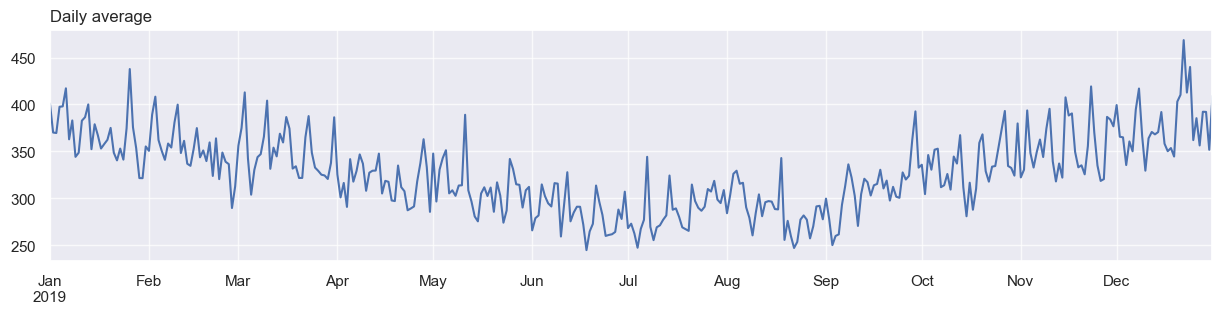

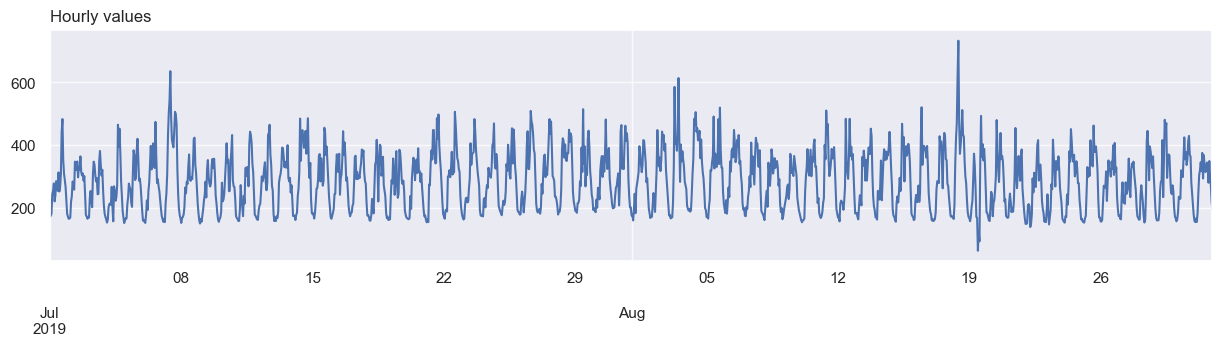

In [10]:
HOME_mean.loc['2019'].resample('D').mean().plot(title='Daily average', figsize=(15,3))
plt.show()
HOME_mean.loc['2019-07':'2019-08'].plot(title='Hourly values', figsize=(15,3))
plt.show()

In [11]:
df_dataset = HOME_mean.rename('load').to_frame().copy()


index_temp = df_dataset.index.copy()

df_dataset['date'] = pd.to_datetime(df_dataset.index.date)
df_dataset['year'] = df_dataset.index.year.astype('int')
df_dataset['weekday'] = df_dataset.index.weekday
df_dataset['hour'] = df_dataset.index.hour + df_dataset.index.minute/60
df_dataset['timeofweek'] = df_dataset['hour'] + df_dataset['weekday']*24

df_dataset['load_shift24'] = df_dataset['load'].shift(24)
df_dataset['load_shift168'] = df_dataset['load'].shift(168)

df_dataset = df_dataset.merge(hamelin_weather['WEATHER_T'], left_index=True, right_index=True)
df_dataset['WEATHER_T_roll24_mean'] = df_dataset['WEATHER_T'].rolling(24).mean()

df_dataset = df_dataset.merge(df_holiday, on='date')
df_dataset = df_dataset.merge(df_holiday_encode, on='date')
df_dataset = df_dataset.merge(all_trends_DE.reset_index(), on='date')
#df_dataset = df_dataset.drop('date',axis=1)
df_dataset.index = index_temp


df_dataset

load       date  year  weekday  hour  timeofweek  \
2018-05-18 01:00:00  183.358877 2018-05-18  2018        4   1.0        97.0   
2018-05-18 02:00:00  168.608142 2018-05-18  2018        4   2.0        98.0   
2018-05-18 03:00:00  212.435030 2018-05-18  2018        4   3.0        99.0   
2018-05-18 04:00:00  366.932407 2018-05-18  2018        4   4.0       100.0   
2018-05-18 05:00:00  456.314655 2018-05-18  2018        4   5.0       101.0   
...                         ...        ...   ...      ...   ...         ...   
2020-12-31 19:00:00  459.419851 2020-12-31  2020        3  19.0        91.0   
2020-12-31 20:00:00  366.613639 2020-12-31  2020        3  20.0        92.0   
2020-12-31 21:00:00  382.776537 2020-12-31  2020        3  21.0        93.0   
2020-12-31 22:00:00  343.477349 2020-12-31  2020        3  22.0        94.0   
2020-12-31 23:00:00  309.179676 2020-12-31  2020        3  23.0        95.0   

                     load_shift24  load_shift168  WEATHER_T  \
2018-05-18 01:00:00           NaN            NaN  10.200000   
2018-05-18 02:00:00           NaN            NaN   9.900000   
2018-05-18 03:00:00           NaN            NaN   9.400000   
2018-05-18 04:00:00           NaN            NaN   9.100000   
2018-05-18 05:00:00           NaN            NaN   8.700000   
...                           ...            ...        ...   
2020-12-31 19:00:00    537.941561     447.137546   1.883333   
2020-12-31 20:00:00    389.495375     366.149137   1.816667   
2020-12-31 21:00:00    351.260483     329.952042   1.550000   
2020-12-31 22:00:00    302.292196     334.764004   1.266667   
2020-12-31 23:00:00    215.738754     303.509996   1.200000   

                     WEATHER_T_roll24_mean    holiday_Name  holiday_Type  \
2018-05-18 01:00:00                    NaN         weekday       weekday   
2018-05-18 02:00:00                    NaN         weekday       weekday   
2018-05-18 03:00:00                    NaN         weekday       weekday   
2018-05-18 04:00:00                    NaN         weekday       weekday   
2018-05-18 05:00:00                    NaN         weekday       weekday   
...                                    ...             ...           ...   
2020-12-31 19:00:00               2.717361  New Year's Eve  Bank holiday   
2020-12-31 20:00:00               2.649306  New Year's Eve  Bank holiday   
2020-12-31 21:00:00               2.582986  New Year's Eve  Bank holiday   
2020-12-31 22:00:00               2.509375  New Year's Eve  Bank holiday   
2020-12-31 23:00:00               2.417014  New Year's Eve  Bank holiday   

                     holiday_Name_encode  holiday_Type_encode  \
2018-05-18 01:00:00                   20                    7   
2018-05-18 02:00:00                   20                    7   
2018-05-18 03:00:00                   20                    7   
2018-05-18 04:00:00                   20                    7   
2018-05-18 05:00:00                   20                    7   
...                                  ...                  ...   
2020-12-31 19:00:00                   15                    0   
2020-12-31 20:00:00                   15                    0   
2020-12-31 21:00:00                   15                    0   
2020-12-31 22:00:00                   15                    0   
2020-12-31 23:00:00                   15                    0   

                     Bachelor's degree  Board of education  Box office  \
2018-05-18 01:00:00          -0.418423           -0.380488    1.149021   
2018-05-18 02:00:00          -0.418423           -0.380488    1.149021   
2018-05-18 03:00:00          -0.418423           -0.380488    1.149021   
2018-05-18 04:00:00          -0.418423           -0.380488    1.149021   
2018-05-18 05:00:00          -0.418423           -0.380488    1.149021   
...                                ...                 ...         ...   
2020-12-31 19:00:00          -1.126246           -0.425841   -0.973829   
2020-12-31 20:00:00          -1.126

## 1st model: temporal feature + weather feature

C:\Users\user\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='timeofweek', ylabel='load'>

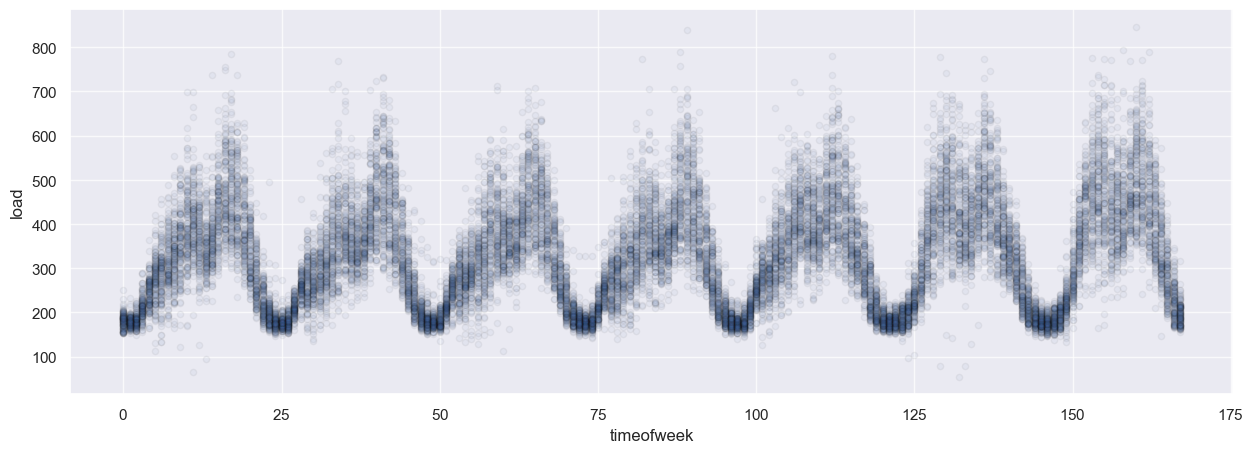

In [12]:
df_dataset.plot(kind='scatter',x='timeofweek',y='load', figsize=(15,5),alpha=0.05)

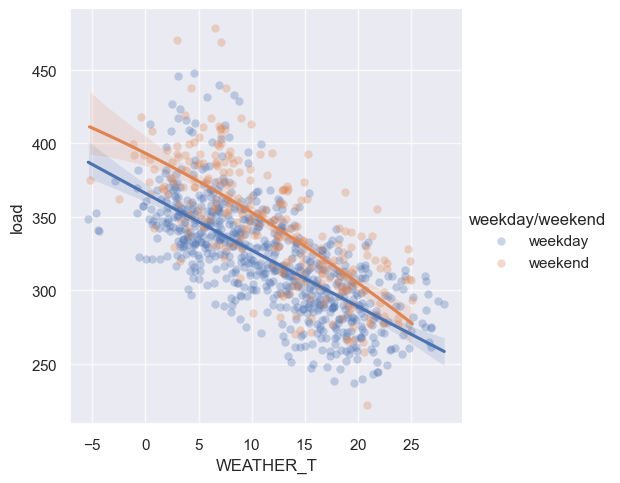

In [13]:
# Scatter plot for demand and outdoor temperature
df_plot = df_dataset.resample('D').mean().copy()
df_plot['weekday/weekend'] = 'weekday'
df_plot.loc[df_plot['weekday']>4, 'weekday/weekend'] ='weekend'

sns.lmplot(x='WEATHER_T', y='load', hue="weekday/weekend",
           data=df_plot, order=2, scatter_kws={'alpha':0.3})

In [14]:
list_feat = ['weekday','hour','WEATHER_T', 'WEATHER_T_roll24_mean']

Model: LGBM
R SQUARED: 0.7393
MAE: 42.4454


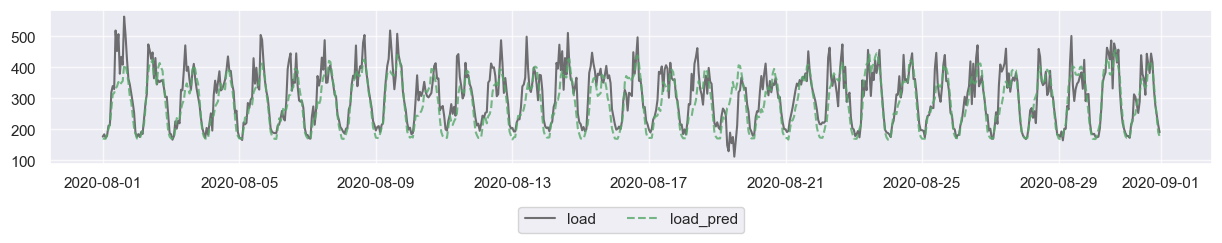

In [15]:
traindata = df_dataset.loc[:'2019'].copy()
testdata = df_dataset.loc['2020':].copy()

LGB_model = lgb.LGBMRegressor()
LGB_model.fit(traindata[list_feat], traindata['load'])
testdata['load_pred'] = LGB_model.predict(testdata[list_feat])
errors = abs(testdata['load_pred'] - testdata['load'])
RSQUARED = r2_score(testdata['load'], testdata['load_pred'])
MAE = mean_absolute_error(testdata['load'], testdata['load_pred'])

print("Model: LGBM")
print("R SQUARED: "+str(round(RSQUARED,4)))
print("MAE: "+str(round(MAE,4)))

plt.figure(figsize=(15,2))
plt.plot(testdata.loc['2020-8'].index, testdata.loc['2020-8','load'], '-k', alpha=0.6, label='load')
plt.plot(testdata.loc['2020-8'].index, testdata.loc['2020-8','load_pred'], '--g', alpha=0.8, label='load_pred')
plt.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.5))

## 2nd model: add calendar data

In [16]:
list_feat = ['weekday','hour','WEATHER_T', 'WEATHER_T_roll24_mean',
             'holiday_Name_encode','holiday_Type_encode']

Model: LGBM
R SQUARED: 0.741
MAE: 42.2192


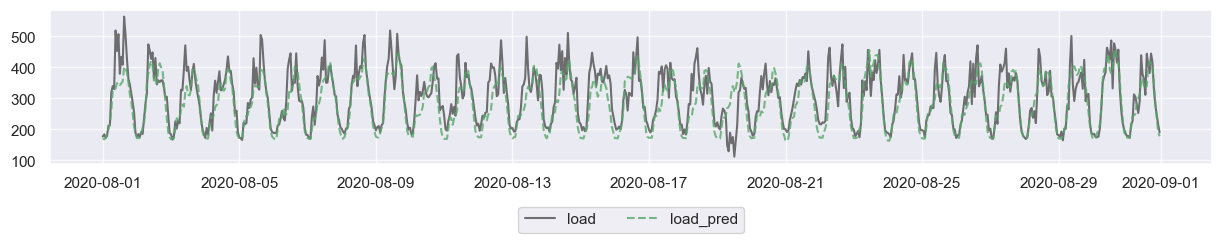

In [17]:
traindata = df_dataset.loc[:'2019'].copy()
testdata = df_dataset.loc['2020':].copy()

LGB_model = lgb.LGBMRegressor()
LGB_model.fit(traindata[list_feat], traindata['load'])
testdata['load_pred'] = LGB_model.predict(testdata[list_feat])
errors = abs(testdata['load_pred'] - testdata['load'])
RSQUARED = r2_score(testdata['load'], testdata['load_pred'])
MAE = mean_absolute_error(testdata['load'], testdata['load_pred'])

print("Model: LGBM")
print("R SQUARED: "+str(round(RSQUARED,4)))
print("MAE: "+str(round(MAE,4)))

plt.figure(figsize=(15,2))
plt.plot(testdata.loc['2020-8'].index, testdata.loc['2020-8','load'], '-k', alpha=0.6, label='load')
plt.plot(testdata.loc['2020-8'].index, testdata.loc['2020-8','load_pred'], '--g', alpha=0.8, label='load_pred')
plt.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.5))

## 3rd model: add lag features

In [18]:
list_feat = ['weekday','hour','WEATHER_T', 'WEATHER_T_roll24_mean',
             'holiday_Name_encode','holiday_Type_encode',
             'load_shift24', 'load_shift168']

Model: LGBM
R SQUARED: 0.7811
MAE: 38.5363


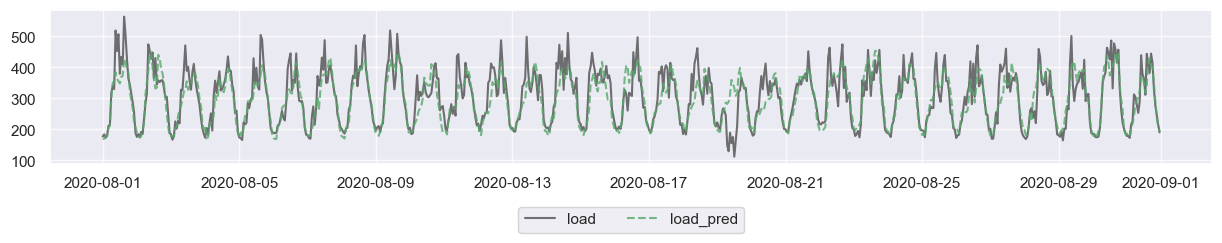

In [19]:
traindata = df_dataset.loc[:'2019'].copy()
testdata = df_dataset.loc['2020':].copy()

LGB_model = lgb.LGBMRegressor()
LGB_model.fit(traindata[list_feat], traindata['load'])
testdata['load_pred'] = LGB_model.predict(testdata[list_feat])
errors = abs(testdata['load_pred'] - testdata['load'])
RSQUARED = r2_score(testdata['load'], testdata['load_pred'])
MAE = mean_absolute_error(testdata['load'], testdata['load_pred'])

print("Model: LGBM")
print("R SQUARED: "+str(round(RSQUARED,4)))
print("MAE: "+str(round(MAE,4)))

plt.figure(figsize=(15,2))
plt.plot(testdata.loc['2020-8'].index, testdata.loc['2020-8','load'], '-k', alpha=0.6, label='load')
plt.plot(testdata.loc['2020-8'].index, testdata.loc['2020-8','load_pred'], '--g', alpha=0.8, label='load_pred')
plt.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.5))

## 4rd model: add google trends data

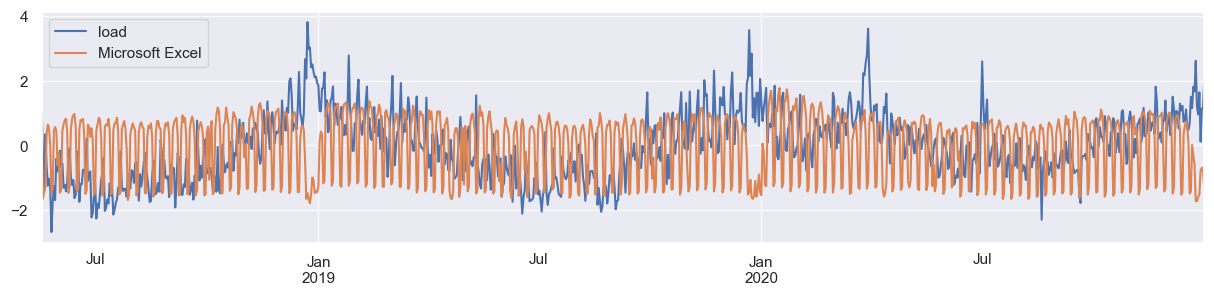

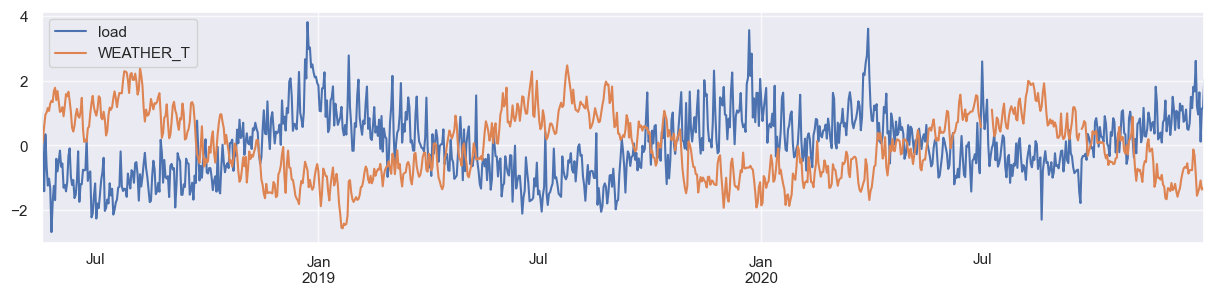

In [20]:
df_plot = df_dataset.resample('D').mean()
df_plot = (df_plot-df_plot.mean())/df_plot.std()
df_plot[['load','Microsoft Excel']].loc[:'2020'].plot(figsize=(15,3))
plt.show()
df_plot[['load','WEATHER_T']].loc[:'2020'].plot(figsize=(15,3))
plt.show()

In [21]:
list_feat = ['weekday','hour','WEATHER_T', 'WEATHER_T_roll24_mean',
             'holiday_Name_encode','holiday_Type_encode',
             'load_shift24', 'load_shift168',
             'Microsoft Excel', 'Education']

Model: LGBM
R SQUARED: 0.7866
MAE: 38.3077


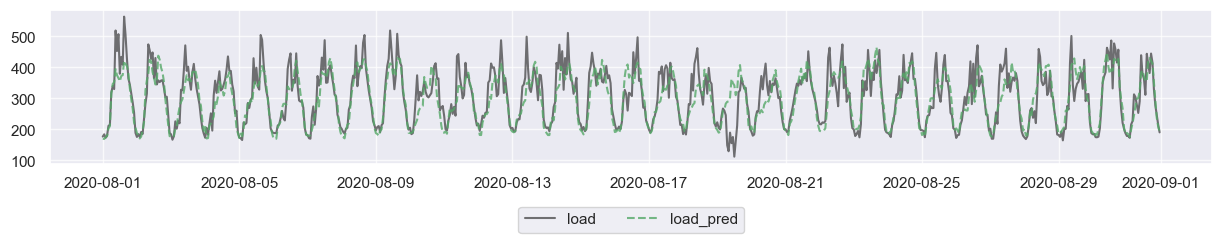

In [22]:
traindata = df_dataset.loc[:'2019'].copy()
testdata = df_dataset.loc['2020':].copy()

LGB_model = lgb.LGBMRegressor()
LGB_model.fit(traindata[list_feat], traindata['load'])
testdata['load_pred'] = LGB_model.predict(testdata[list_feat])
errors = abs(testdata['load_pred'] - testdata['load'])
RSQUARED = r2_score(testdata['load'], testdata['load_pred'])
MAE = mean_absolute_error(testdata['load'], testdata['load_pred'])

print("Model: LGBM")
print("R SQUARED: "+str(round(RSQUARED,4)))
print("MAE: "+str(round(MAE,4)))

plt.figure(figsize=(15,2))
plt.plot(testdata.loc['2020-8'].index, testdata.loc['2020-8','load'], '-k', alpha=0.6, label='load')
plt.plot(testdata.loc['2020-8'].index, testdata.loc['2020-8','load_pred'], '--g', alpha=0.8, label='load_pred')
plt.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.5))